<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = "reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [3]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [5]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf_vect.fit(train.review_body.values);

In [6]:
X_train = tfidf_vect.transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [7]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train);

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [8]:
y_pred_dt = dt.predict(X_test)
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")

Árbol de decisión:      0.78


In [9]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Árbol de decisión: {metrica(y_test, y_pred_dt, pos_label='video_games'):.2f}")
    print()

precision_score
Árbol de decisión: 0.81

recall_score
Árbol de decisión: 0.75

f1_score
Árbol de decisión: 0.78



In [10]:
print("Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()

Árbol de decisión
              precision    recall  f1-score   support

     jewelry       0.75      0.81      0.78        97
 video_games       0.81      0.75      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200




###  `[BONUS: 3 pts]` Matriz de confusión

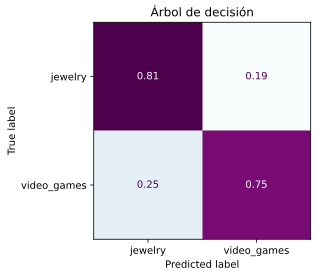

In [11]:
%config InlineBackend.figure_format = 'svg'
plot_confusion_matrix(dt, X_test, y_test, cmap = 'BuPu', normalize='true').im_.colorbar.remove() 
plt.title("Árbol de decisión");

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [12]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab

{1897: 'mismísimo',
 1637: 'juego',
 2077: 'ordenador',
 685: 'creía',
 1840: 'mejorado',
 1424: 'gráficos',
 294: 'bien',
 2466: 'queda',
 670: 'corto',
 103: 'ahora',
 2366: 'primera',
 3144: 'vez',
 583: 'compro',
 149: 'amazon',
 3051: 'ultima',
 2777: 'sido',
 2213: 'perfecta',
 334: 'buenas',
 568: 'compramos',
 517: 'colgante',
 1312: 'forma',
 652: 'corazón',
 2717: 'salido',
 773: 'defectuoso',
 683: 'creo',
 2273: 'plata',
 3160: 'vino',
 373: 'caja',
 2527: 'rayado',
 1511: 'ido',
 2530: 'rayando',
 1744: 'llevándolo',
 705: 'cuerpo',
 370: 'caerse',
 2150: 'pasando',
 701: 'cuello',
 990: 'durado',
 314: 'bonito',
 969: 'dos',
 1001: 'días',
 978: 'duda',
 2108: 'pagaría',
 439: 'casi',
 1895: 'mismo',
 3112: 'vendedor',
 1169: 'esperamos',
 2646: 'respuesta',
 1732: 'llegó',
 1000: 'día',
 2979: 'tocaba',
 2164: 'pedí',
 89: 'agosto',
 911: 'dijeron',
 1728: 'llegaría',
 1672: 'lanzamiento',
 2022: 'noviembre',
 204: 'aquí',
 3154: 'viendo',
 156: 'amigos',
 2030: 'nunca',

In [13]:
#Clase "Jewerly"
[(vocab[e[0]],round(e[1],2)) for e in zip(dt.feature_importances_.argsort(), sorted(dt.feature_importances_))][-10:]

[('plata', 0.02),
 ('perfecto', 0.02),
 ('bonita', 0.02),
 ('foto', 0.02),
 ('pulsera', 0.03),
 ('bonitos', 0.03),
 ('bonito', 0.03),
 ('calidad', 0.03),
 ('mando', 0.06),
 ('juego', 0.12)]

In [14]:
#Clase "video_games"
[(vocab[e[0]],round(e[1],2)) for e in zip(dt.feature_importances_.argsort(), sorted(dt.feature_importances_))][:10]

[('abajo', 0.0),
 ('papá', 0.0),
 ('paquete', 0.0),
 ('paquetería', 0.0),
 ('paquetes', 0.0),
 ('par', 0.0),
 ('paradas', 0.0),
 ('parche', 0.0),
 ('parecen', 0.0),
 ('parecia', 0.0)]

In [15]:
sorted(dt.feature_importances_)[1:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

In [23]:
print("Basado en los resultados del modelo y los estadísticos de ajuste, es posible afirmar que este predice con un 80% de precisión",
      "las categorías preestablecidas, así también, las palabras clave o que tienen más importancia dentro de cada una de las categorías",
     "están sumamente relacionadas con la terminología usada al interior de cada una de ellas.")



Basado en los resultados del modelo y los estadísticos de ajuste, es posible afirmar que este predice con un 80% de precisión las categorías preestablecidas, así también, las palabras clave o que tienen más importancia dentro de cada una de las categorías están sumamente relacionadas con la terminología usada al interior de cada una de ellas.


In [ ]:
print("Por otro lado, el gráfico a continuación permite identificar que las palabras 'juego', 'mando' y 'calidad' permiten",
     "al modelo diferenciar con alta precisión si se trata de una categoría u otra.")

In [20]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Brayam Pineda/anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz/'

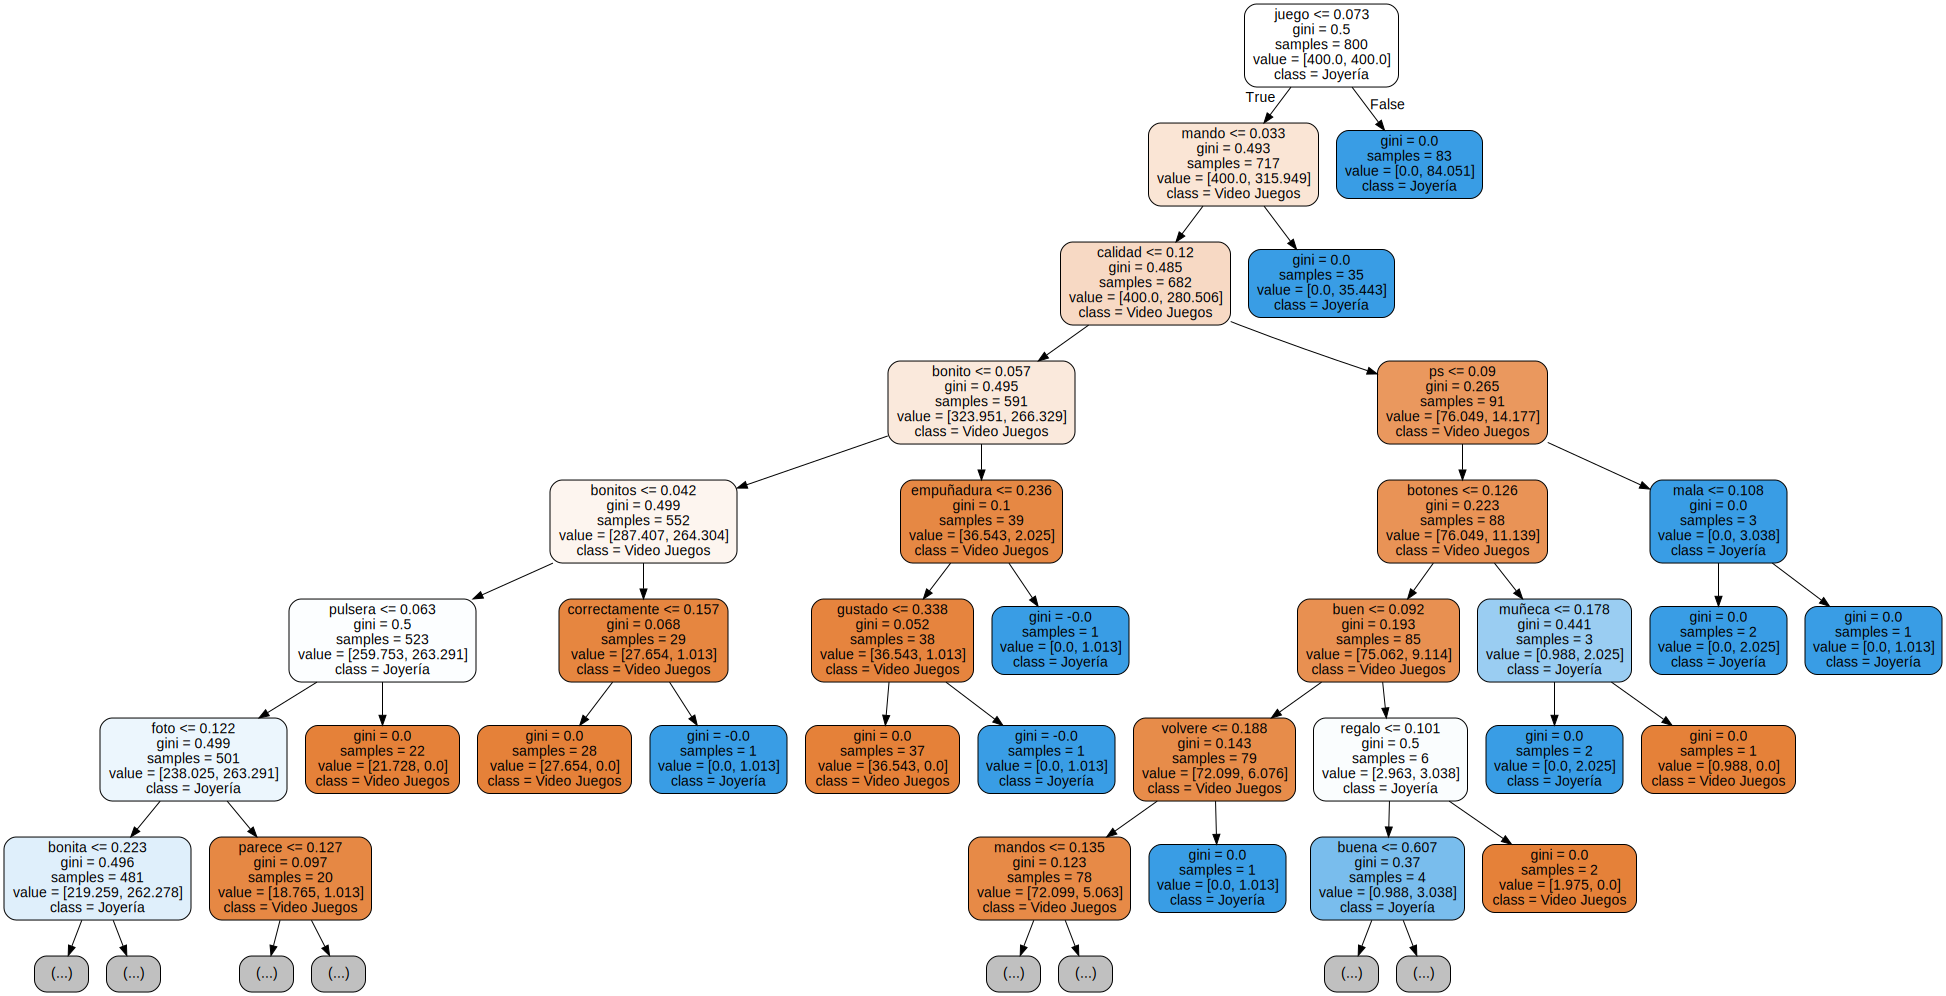

In [22]:
import graphviz 
from sklearn.tree import export_graphviz

viz = export_graphviz(dt, 
                      out_file=None, # ¿Salvar en el computador?
                      max_depth=7, # Máxima profundidad
                      feature_names=list(dict(sorted(tfidf_vect.vocabulary_.items())).keys()), # Palabras
                      class_names = ['Video Juegos', 'Joyería'],
                      rounded=True, filled=True
                     )

graph = graphviz.Source(viz)
graph
